# ID/X Partners new_df Scientist Project Based Internship Program

## Alfendio Alif Faudisyah

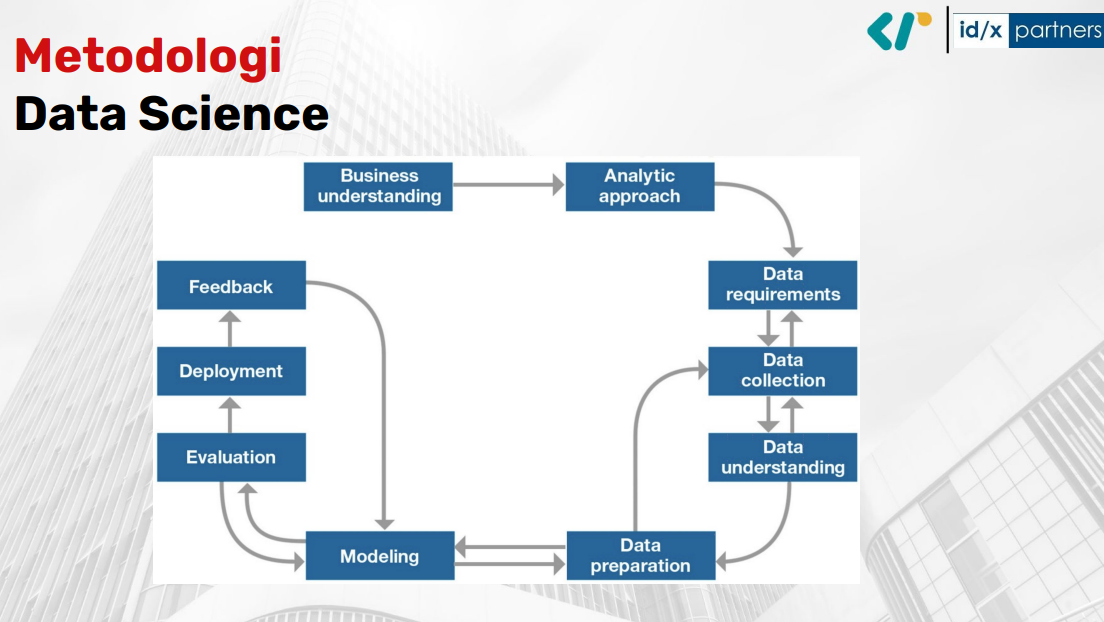

Membangun model yang dapat memprediksi credit risk menggunakan new_dfset yang disediakan oleh company yang terdiri dari new_df pinjaman yang diterima dan yang ditolak.

# Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# new_df Collection

In [2]:
df = pd.read_csv('loan_new_df_2007_2014.csv', index_col=0)

C:\Users\alfen\AppData\Local\Temp\ipykernel_16256\487600896.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv', index_col=0)


# new_df Understanding

In [4]:
df.shape

(466285, 74)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [6]:
df.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
9605,846821,1058249,6000,6000,6000.0,36 months,10.99,196.41,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.id.nunique()

466285

In [8]:
df.member_id.nunique()

466285

# new_df Preparation

In [9]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]

In [10]:
new_df = df.drop(cols_to_drop, axis=1)

In [12]:
new_df.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
61957,16000,16000,16000.0,36 months,16.20,564.10,C,IT Specialist,3 years,RENT,...,NaN,Jan-16,0.0,24.0,1,INDIVIDUAL,0.0,0.0,179844.0,14100.0
139805,3200,3200,3200.0,36 months,23.63,124.93,F,smart and final,5 years,RENT,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,6418.0,7300.0
199020,18250,18250,18250.0,60 months,19.72,480.68,D,KTA Super Stores,10+ years,MORTGAGE,...,NaN,Sep-15,0.0,19.0,1,INDIVIDUAL,0.0,0.0,496962.0,30100.0
420821,11900,11900,11900.0,60 months,19.47,311.78,D,NaN,NaN,OWN,...,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,25504.0,16700.0
74179,20000,20000,19950.0,60 months,11.99,444.79,B,transportation worker,10+ years,MORTGAGE,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,119029.0,32600.0
342335,10000,10000,10000.0,36 months,12.49,334.49,B,Registered Nurse,10+ years,RENT,...,Feb-16,Jan-16,0.0,31.0,1,INDIVIDUAL,0.0,0.0,33187.0,9300.0
158910,6350,6350,6350.0,36 months,13.11,214.30,B,PR Newswire,5 years,RENT,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,96865.0,22800.0
121026,9000,9000,9000.0,36 months,13.68,306.21,C,Scripps,< 1 year,RENT,...,NaN,Jun-14,0.0,NaN,1,INDIVIDUAL,0.0,0.0,37100.0,7800.0
25405,3600,3600,3600.0,36 months,7.14,111.39,A,Willard City Schools,10+ years,MORTGAGE,...,NaN,May-12,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
195605,18000,18000,17925.0,60 months,19.05,467.43,D,Your Home Medical,10+ years,MORTGAGE,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,231444.0,23400.0


## Labelling

In [13]:
new_df.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [16]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

new_df['bad_flag'] = np.where(new_df['loan_status'].isin(bad_status), 1, 0)

In [17]:
new_df['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

## Feature Engineering

In [19]:
new_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [20]:
new_df['emp_length_int'] = new_df['emp_length'].str.replace('\+ years', '')
new_df['emp_length_int'] = new_df['emp_length_int'].str.replace('< 1 year', str(0))
new_df['emp_length_int'] = new_df['emp_length_int'].str.replace(' years', '')
new_df['emp_length_int'] = new_df['emp_length_int'].str.replace(' year', '')

C:\Users\alfen\AppData\Local\Temp\ipykernel_16256\4229369101.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['emp_length_int'] = new_df['emp_length'].str.replace('\+ years', '')


In [21]:
new_df['emp_length_int'] = new_df['emp_length_int'].astype(float)

In [22]:
new_df.drop('emp_length', axis=1, inplace=True)

In [23]:
new_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [24]:
new_df['term_int'] = new_df['term'].str.replace(' months', '')
new_df['term_int'] = new_df['term_int'].astype(float)

In [25]:
new_df.drop('term', axis=1, inplace=True)

In [26]:
new_df['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [28]:
new_df['earliest_cr_line_date'] = pd.to_datetime(new_df['earliest_cr_line'], format='%b-%y')
new_df['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [30]:
new_df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - new_df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
new_df['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [31]:
new_df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [32]:
new_df[new_df['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(5)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0


In [33]:
new_df.loc[new_df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = new_df['mths_since_earliest_cr_line'].max()

In [34]:
new_df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

In [35]:
new_df['issue_d_date'] = pd.to_datetime(new_df['issue_d'], format='%b-%y')
new_df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - new_df['issue_d_date']) / np.timedelta64(1, 'M')))

In [36]:
new_df['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [37]:
new_df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [38]:
new_df['last_pymnt_d_date'] = pd.to_datetime(new_df['last_pymnt_d'], format='%b-%y')
new_df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - new_df['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [39]:
new_df['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [40]:
new_df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [41]:
new_df['next_pymnt_d_date'] = pd.to_datetime(new_df['next_pymnt_d'], format='%b-%y')
new_df['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - new_df['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [42]:
new_df['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [43]:
new_df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [44]:
new_df['last_credit_pull_d_date'] = pd.to_datetime(new_df['last_credit_pull_d'], format='%b-%y')
new_df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - new_df['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [45]:
new_df['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [46]:
new_df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

## Exploratory new_df Analysis

<AxesSubplot:>

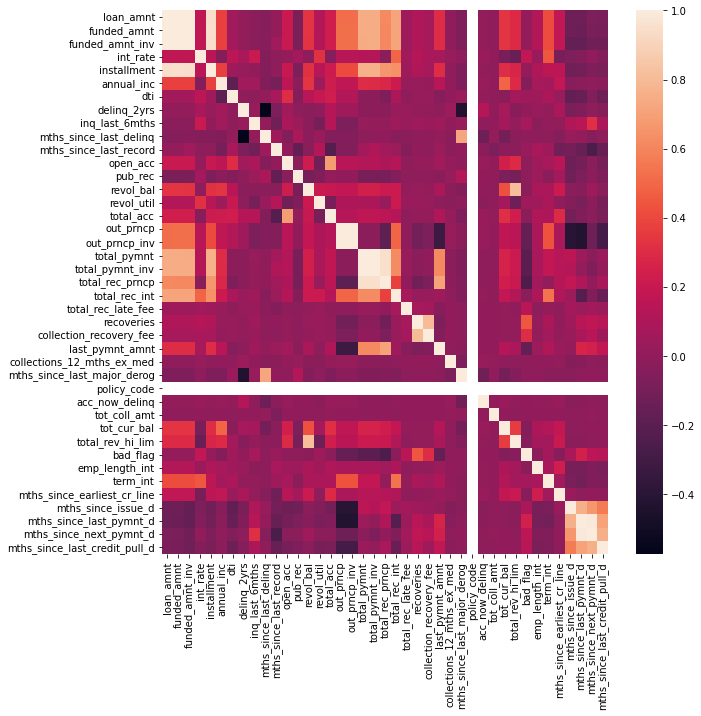

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr())

In [51]:
corr_matrix = new_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\alfen\AppData\Local\Temp\ipykernel_16256\4783965.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [52]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [53]:
new_df.drop(to_drop_hicorr, axis=1, inplace=True)

In [54]:
new_df.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [55]:
new_df.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [56]:
new_df.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

In [57]:
new_df.drop(['policy_code'], axis=1, inplace=True)

In [58]:
for col in new_df.select_dtypes(include='object').columns.tolist():
    print(new_df[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Cha

In [59]:
new_df.drop('pymnt_plan', axis=1, inplace=True)

In [60]:
check_missing = new_df.isnull().sum() * 100 / new_df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

In [61]:
new_df.drop('mths_since_last_record', axis=1, inplace=True)

In [62]:
new_df['annual_inc'].fillna(new_df['annual_inc'].mean(), inplace=True)
new_df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
new_df['acc_now_delinq'].fillna(0, inplace=True)
new_df['total_acc'].fillna(0, inplace=True)
new_df['pub_rec'].fillna(0, inplace=True)
new_df['open_acc'].fillna(0, inplace=True)
new_df['inq_last_6mths'].fillna(0, inplace=True)
new_df['delinq_2yrs'].fillna(0, inplace=True)
new_df['collections_12_mths_ex_med'].fillna(0, inplace=True)
new_df['revol_util'].fillna(0, inplace=True)
new_df['emp_length_int'].fillna(0, inplace=True)
new_df['tot_cur_bal'].fillna(0, inplace=True)
new_df['tot_coll_amt'].fillna(0, inplace=True)
new_df['mths_since_last_delinq'].fillna(-1, inplace=True)

In [63]:
categorical_cols = [col for col in new_df.select_dtypes(include='object').columns.tolist()]

In [64]:
onehot = pd.get_dummies(new_df[categorical_cols], drop_first=True)

In [65]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
numerical_cols = [col for col in new_df.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [69]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(new_df[numerical_cols]), columns=numerical_cols)

In [70]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,...,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,...,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,...,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


In [71]:
new_df_model = pd.concat([onehot, std, new_df[['bad_flag']]], axis=1)

# Modeling

## Split Dataset

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = new_df_model.drop('bad_flag', axis=1)
y = new_df_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train.shape, X_test.shape

((373028, 107), (93257, 107))

## Training

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [77]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
98,recoveries,0.360553
13,loan_status_Current,0.182070
20,loan_status_Late (31-120 days),0.125460
17,loan_status_Fully Paid,0.081997
96,out_prncp,0.081247
...,...,...
55,addr_state_MI,0.000000
54,addr_state_ME,0.000000
52,addr_state_MA,0.000000
51,addr_state_LA,0.000000


In [78]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

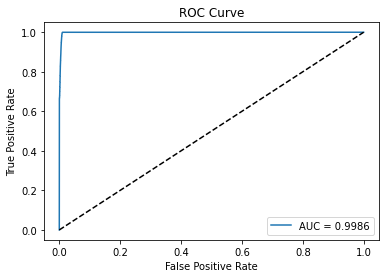

In [80]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [81]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.9895')

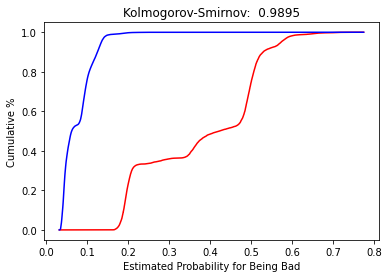

In [82]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)